# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [163]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [164]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../Resources/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [165]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

588

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [166]:
record_count = 1
set_count = 1
city_data = []
#Iterate over each row
for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
#index, row in df.iterrows():
    #city = row['city']
    print("Processing Record %s of set %s | %s" %(record_count, set_count, city))
    record_count += 1
    #city = city.replace(" ", "&")
    url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&q=" + city
    #print(url)
    try:
        weather = requests.get(url).json()
        city_temp = weather['main']['temp']
        lat = weather['coord']['lat']
        lon = weather['coord']['lon']
        country = weather['sys']['country']
        date = weather['dt']
        city_max_temp = weather['main']['temp_max']
        city_humidity = weather['main']['humidity']
        city_wind_speed = weather['wind']['speed']
        city_clouds = weather['clouds']['all']
        
        #Append city into city_info
        city_data.append({"City": city,
                      "Temperature" : city_max_temp,
                      "Humidity" : city_humidity,
                      "Longitude" : lon,
                      "Latitude" : lat,
                      "Cloudiness" : city_clouds,
                      "Country" : country,
                      "Windspeed" : city_wind_speed,
                      "Date" : date})
        
    except:
        print('city not found.Skipping...')
        pass
    
print("----------------------")
print("Data Retrieval Complete")
print("----------------------")

Processing Record 1 of set 1 | saskylakh
Processing Record 2 of set 1 | ushuaia
Processing Record 3 of set 1 | longyearbyen
Processing Record 4 of set 1 | mahebourg
Processing Record 5 of set 1 | nome
Processing Record 6 of set 1 | husavik
Processing Record 7 of set 1 | kavieng
Processing Record 8 of set 1 | leh
Processing Record 9 of set 1 | dikson
Processing Record 10 of set 1 | alappuzha
Processing Record 11 of set 1 | sorong
Processing Record 12 of set 1 | matara
Processing Record 13 of set 1 | inta
Processing Record 14 of set 1 | pandan
Processing Record 15 of set 1 | carnarvon
Processing Record 16 of set 1 | seoul
Processing Record 17 of set 1 | tuktoyaktuk
Processing Record 18 of set 1 | warqla
city not found.Skipping...
Processing Record 19 of set 1 | rikitea
Processing Record 20 of set 1 | port alfred
Processing Record 21 of set 1 | eureka
Processing Record 22 of set 1 | albany
Processing Record 23 of set 1 | hobart
Processing Record 24 of set 1 | taolanaro
city not found.Skip

Processing Record 32 of set 4 | poso
Processing Record 33 of set 4 | airai
Processing Record 34 of set 4 | maridi
Processing Record 35 of set 4 | chuy
Processing Record 36 of set 4 | vardo
Processing Record 37 of set 4 | athabasca
Processing Record 38 of set 4 | kayasula
Processing Record 39 of set 4 | sorkjosen
Processing Record 40 of set 4 | manhush
Processing Record 41 of set 4 | kamuli
Processing Record 42 of set 4 | uroteppa
city not found.Skipping...
Processing Record 43 of set 4 | aklavik
Processing Record 44 of set 4 | hithadhoo
Processing Record 45 of set 4 | kimbe
Processing Record 46 of set 4 | puerto carreno
Processing Record 47 of set 4 | paita
Processing Record 48 of set 4 | gambo
Processing Record 49 of set 4 | verkhnyaya inta
Processing Record 0 of set 5 | sakakah
Processing Record 1 of set 5 | garmsar
Processing Record 2 of set 5 | beringovskiy
Processing Record 3 of set 5 | augusto correa
Processing Record 4 of set 5 | vaitupu
city not found.Skipping...
Processing Rec

Processing Record 24 of set 8 | inuvik
Processing Record 25 of set 8 | olafsvik
Processing Record 26 of set 8 | gawler
Processing Record 27 of set 8 | grand gaube
Processing Record 28 of set 8 | strangnas
Processing Record 29 of set 8 | prainha
Processing Record 30 of set 8 | sao geraldo do araguaia
Processing Record 31 of set 8 | nushki
Processing Record 32 of set 8 | sobolevo
Processing Record 33 of set 8 | kailua
Processing Record 34 of set 8 | guarapuava
Processing Record 35 of set 8 | dibulla
Processing Record 36 of set 8 | nanga eboko
Processing Record 37 of set 8 | katsuura
Processing Record 38 of set 8 | westport
Processing Record 39 of set 8 | kamina
Processing Record 40 of set 8 | abha
Processing Record 41 of set 8 | pringsewu
Processing Record 42 of set 8 | liverpool
Processing Record 43 of set 8 | kalabagh
Processing Record 44 of set 8 | bismarck
Processing Record 45 of set 8 | samalaeulu
city not found.Skipping...
Processing Record 46 of set 8 | nemuro
Processing Record 47

city not found.Skipping...
Processing Record 14 of set 12 | brae
Processing Record 15 of set 12 | faanui
Processing Record 16 of set 12 | chambas
Processing Record 17 of set 12 | belyy yar
Processing Record 18 of set 12 | belton
Processing Record 19 of set 12 | alexandria
Processing Record 20 of set 12 | raisinghnagar
Processing Record 21 of set 12 | powell river
Processing Record 22 of set 12 | stornoway
Processing Record 23 of set 12 | khonsa
Processing Record 24 of set 12 | skoghall
Processing Record 25 of set 12 | tateyama
Processing Record 26 of set 12 | oeiras do para
Processing Record 27 of set 12 | nuuk
Processing Record 28 of set 12 | san lorenzo
Processing Record 29 of set 12 | hereford
Processing Record 30 of set 12 | hammerfest
Processing Record 31 of set 12 | raga
Processing Record 32 of set 12 | awjilah
Processing Record 33 of set 12 | chinu
Processing Record 34 of set 12 | ngunguru
Processing Record 35 of set 12 | hamilton
Processing Record 36 of set 12 | fereydun kenar


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [167]:
city_data_pd = pd.DataFrame(city_data)
city_data_pd.head()

,City,Temperature,Humidity,Longitude,Latitude,Cloudiness,Country,Windspeed,Date
0,saskylakh,266.87,97,114.08,71.92,98,RU,3.25,1603220266
1,ushuaia,280.15,56,-68.30,-54.80,40,AR,8.70,1603220266
2,longyearbyen,268.15,79,15.64,78.22,2,SJ,2.60,1603220266
3,mahebourg,297.15,73,57.70,-20.41,20,MU,4.60,1603220106
4,nome,274.15,80,-165.41,64.50,20,US,2.45,1603220266


In [168]:
city_data_pd.to_csv("cities.csv")
city_data_pd.head()

,City,Temperature,Humidity,Longitude,Latitude,Cloudiness,Country,Windspeed,Date
0,saskylakh,266.87,97,114.08,71.92,98,RU,3.25,1603220266
1,ushuaia,280.15,56,-68.30,-54.80,40,AR,8.70,1603220266
2,longyearbyen,268.15,79,15.64,78.22,2,SJ,2.60,1603220266
3,mahebourg,297.15,73,57.70,-20.41,20,MU,4.60,1603220106
4,nome,274.15,80,-165.41,64.50,20,US,2.45,1603220266


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [169]:
#  Get the indices of cities that have humidity over 100%.
high_humidity = city_data_pd[city_data_pd["Humidity"] > 100]
high_humidity[['City', 'Longitude', 'Latitude', 'Humidity']]

,City,Longitude,Latitude,Humidity


No cities had humidity(%) greater than 100.

In [170]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city-data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_pd[city_data_pd["Humidity"] <= 100]
clean_city_data

,City,Temperature,Humidity,Longitude,Latitude,Cloudiness,Country,Windspeed,Date
0,saskylakh,266.87,97,114.08,71.92,98,RU,3.25,1603220266
1,ushuaia,280.15,56,-68.30,-54.80,40,AR,8.70,1603220266
2,longyearbyen,268.15,79,15.64,78.22,2,SJ,2.60,1603220266
3,mahebourg,297.15,73,57.70,-20.41,20,MU,4.60,1603220106
4,nome,274.15,80,-165.41,64.50,20,US,2.45,1603220266
...,...,...,...,...,...,...,...,...,...
530,chinu,302.46,70,-75.40,9.11,85,CO,1.52,1603220332
531,ngunguru,284.82,95,174.50,-35.62,100,NZ,1.68,1603220332
532,hamilton,285.15,93,-84.53,39.18,90,US,2.10,1603220208
533,fereydun kenar,291.15,88,52.52,36.69,14,IR,2.10,1603220332


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

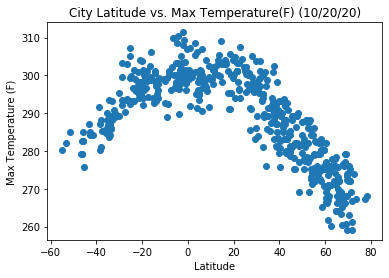

<Figure size 432x288 with 0 Axes>

In [171]:
plt.scatter(clean_city_data.iloc[:,4], clean_city_data.iloc[:,1])
plt.title('City Latitude vs. Max Temperature(F) (10/20/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

plt.savefig('LatVsTemp.png')

This code is analyzing the highest temperatures at city latitudes. It indicates that the temperatures are higher closer the to equater(Latitude of 0).

## Latitude vs. Humidity Plot

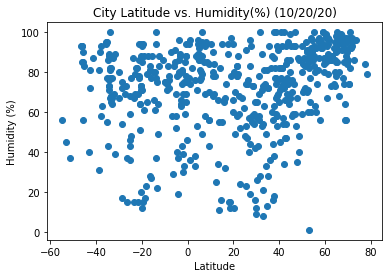

<Figure size 432x288 with 0 Axes>

In [172]:
plt.scatter(clean_city_data.iloc[:,4], clean_city_data.iloc[:,2])
plt.title('City Latitude vs. Humidity(%) (10/20/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

plt.savefig('LatVsHumidity.png')

This code is analyzing the percent humidity at city latitudes. The dense cluster in the upper right corner indicates that the humidity is higher at higher latitudes.

## Latitude vs. Cloudiness Plot

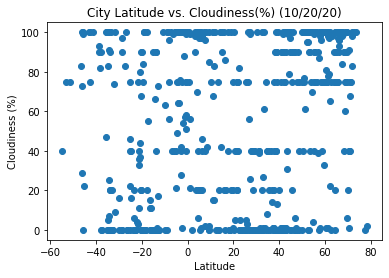

<Figure size 432x288 with 0 Axes>

In [173]:
plt.scatter(clean_city_data.iloc[:,4], clean_city_data.iloc[:,5])
plt.title('City Latitude vs. Cloudiness(%) (10/20/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

plt.savefig('LatVsCloudiness.png')

This code is analyzing the percent cloudiness at city latitudes. It indicates that the cloudiness is dispersed pretty equally throughout the latitudes.

## Latitude vs. Wind Speed Plot

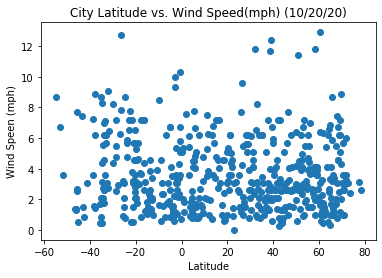

<Figure size 432x288 with 0 Axes>

In [174]:
plt.scatter(clean_city_data.iloc[:,4], clean_city_data.iloc[:,7])
plt.title('City Latitude vs. Wind Speed(mph) (10/20/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speen (mph)')
plt.show()

plt.savefig('LatVsWind.png')

This code is analyzing the wind speeds(mph) at city latitudes. It indicates that the wind speeds are generally lower. The highest wind speeds are found closer to the north and south pole.

## Linear Regression

In [175]:
#Create data sets for Northern and Southern Hemispheres
north_hem = clean_city_data[clean_city_data["Latitude"] >= 0]

south_hem = clean_city_data[clean_city_data["Latitude"] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.77839312265034


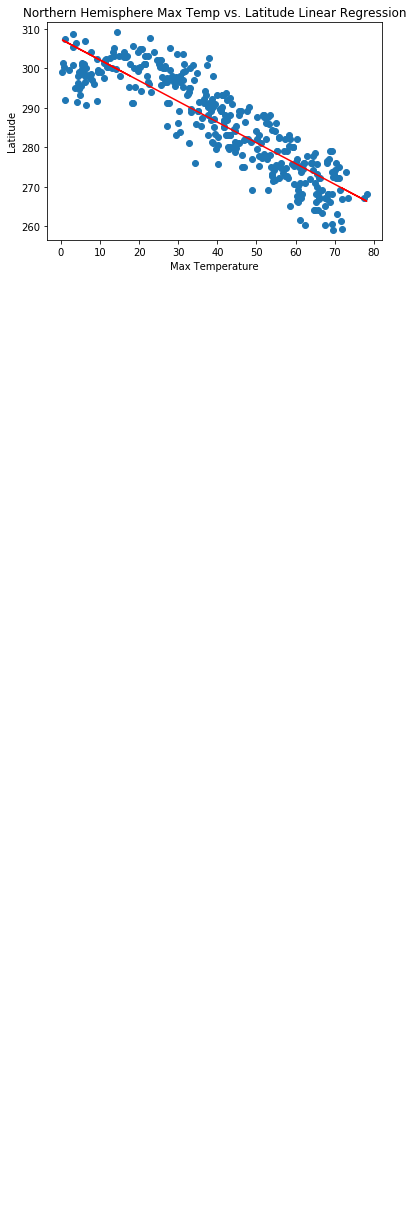

<Figure size 432x288 with 0 Axes>

In [190]:
x_values = north_hem['Latitude']
y_values = north_hem['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y - " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15, color= "red")
plt.xlabel('Max Temperature')
plt.ylabel('Latitude')
plt.title('Northern Hemisphere Max Temp vs. Latitude Linear Regression')

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

plt.savefig('NorthHemLatVsTemp.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6354271199294212


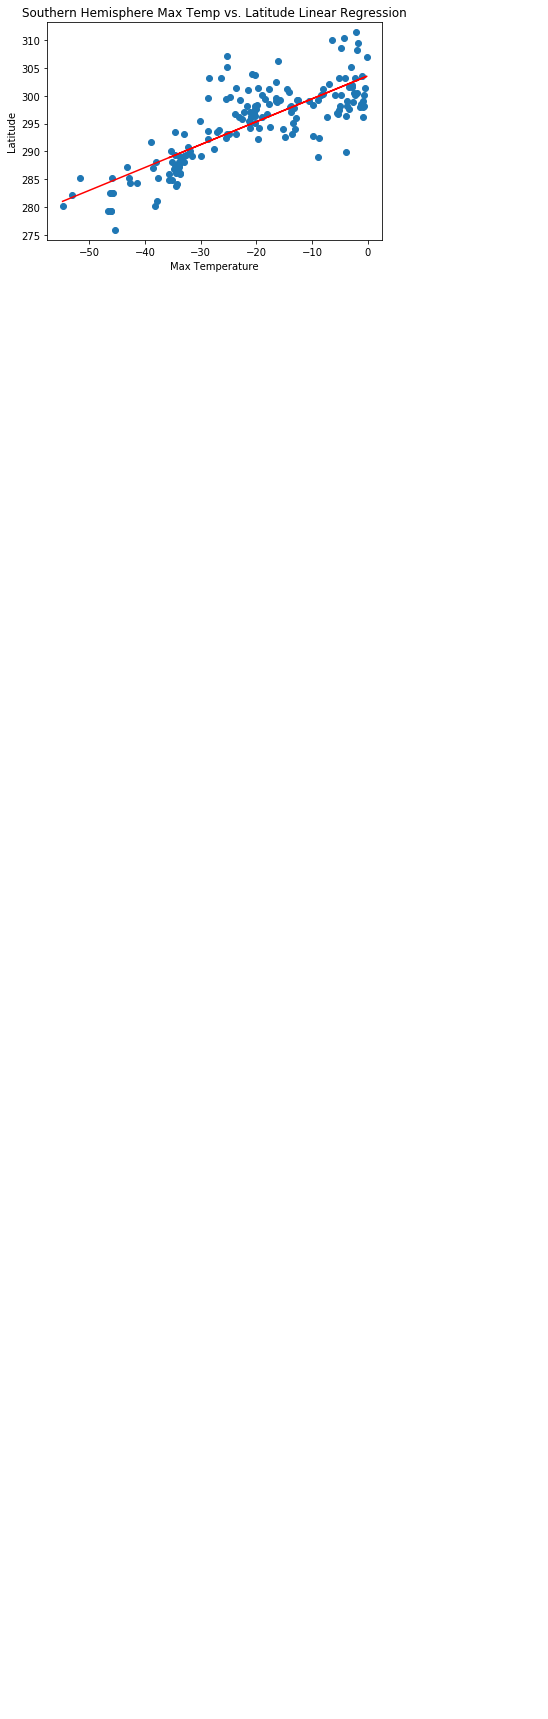

<Figure size 432x288 with 0 Axes>

In [191]:
x_values = south_hem['Latitude']
y_values = south_hem['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y - " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15, color= "red")
plt.xlabel('Max Temperature')
plt.ylabel('Latitude')
plt.title('Southern Hemisphere Max Temp vs. Latitude Linear Regression')

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

plt.savefig('SouthHemLatVsTemp.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0992634883297114


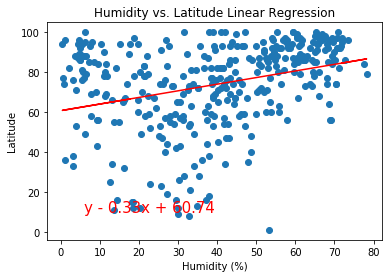

<Figure size 432x288 with 0 Axes>

In [192]:
x_values = north_hem['Latitude']
y_values = north_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y - " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15, color= "red")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.title('Humidity vs. Latitude Linear Regression')

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

plt.savefig('NorthHemLatVsHumidity.png')

In [193]:
#

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.002955261080173451


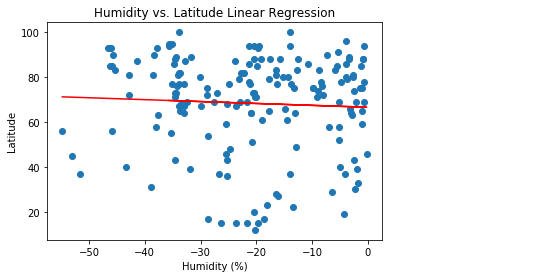

<Figure size 432x288 with 0 Axes>

In [194]:
x_values = south_hem['Latitude']
y_values = south_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y - " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15, color= "red")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.title('Humidity vs. Latitude Linear Regression')

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

plt.savefig('SouthHemLatVsHumidity.png')

In [195]:
#

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.05712739517883373


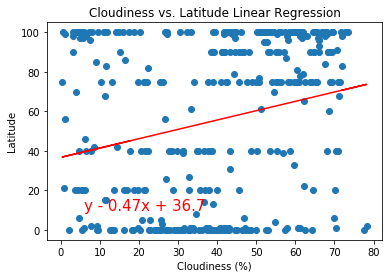

<Figure size 432x288 with 0 Axes>

In [196]:
x_values = north_hem['Latitude']
y_values = north_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y - " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15, color= "red")
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.title('Cloudiness vs. Latitude Linear Regression')

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

plt.savefig('NorthHemLatVsCloudiness.png')

In [197]:
#

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0196037187717222


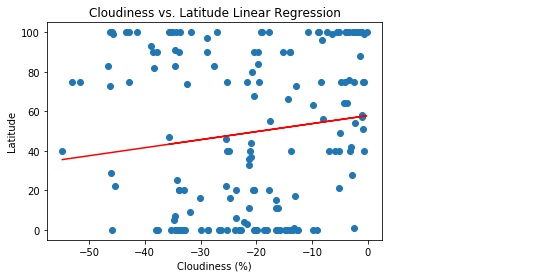

<Figure size 432x288 with 0 Axes>

In [198]:
x_values = south_hem['Latitude']
y_values = south_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y - " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15, color= "red")
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.title('Cloudiness vs. Latitude Linear Regression')

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

plt.savefig('SouthHemLatVsCloudiness.png')

In [199]:
#

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.00031106617973015327


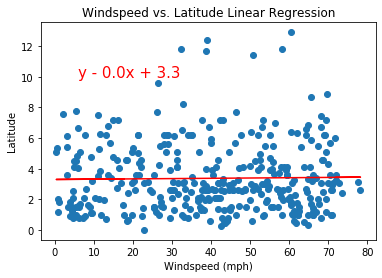

<Figure size 432x288 with 0 Axes>

In [200]:
x_values = north_hem['Latitude']
y_values = north_hem['Windspeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y - " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15, color= "red")
plt.xlabel('Windspeed (mph)')
plt.ylabel('Latitude')
plt.title('Windspeed vs. Latitude Linear Regression')

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

plt.savefig('NorthHemLatVsWind.png')

In [201]:
#

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017075234041300884


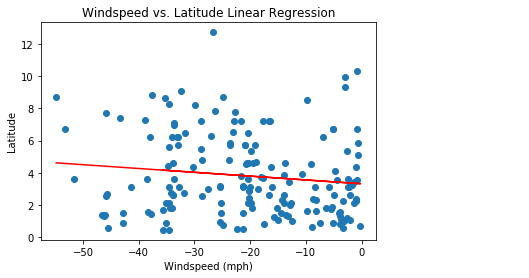

<Figure size 432x288 with 0 Axes>

In [202]:
x_values = south_hem['Latitude']
y_values = south_hem['Windspeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y - " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15, color= "red")
plt.xlabel('Windspeed (mph)')
plt.ylabel('Latitude')
plt.title('Windspeed vs. Latitude Linear Regression')

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

plt.savefig('SouthHemLatVsWind.png')